# Data Exploration of P2P Loan Dataset
## by Yuren Zhou

# Table of Contents
>## 1. Import Necessary Libraries
>## 2. Data Loading
>## 3. Data Cleansing
>>### 3.1 Remove White Space
>>### 3.2 NA Values
>>### 3.3 Outlier Values
>## 4. Feature Exploration
>>### 4.1 Univariate Plots
>>### 4.2 Bivariate Plots
>>### 4.3 Multivariate Plots

# 1. Import Necessary Libraries

In [1]:
#standard imports
import pandas as pd
import numpy as np
from pandas import DataFrame
import matplotlib.pyplot as plt
from scipy import stats
#data visualization
import seaborn as sns
#data preproessing
import statsmodels.api as sm
from IPython.display import Image  
from pydot import graph_from_dot_data
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler 

In [2]:
import warnings
warnings.filterwarnings('ignore')

# 2. Data Loading

In [3]:
#loading data into the code file from the Kaggle csv files
train = pd.read_csv("cs-training.csv", index_col = 0)
test = pd.read_csv("cs-test.csv", index_col = 0)

In [4]:
#print the first 5 rows to get a sense of the dataset
train.head()

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
1,1,0.766127,45,2,0.802982,9120.0,13,0,6,0,2.0
2,0,0.957151,40,0,0.121876,2600.0,4,0,0,0,1.0
3,0,0.658180,38,1,0.085113,3042.0,2,1,0,0,0.0
4,0,0.233810,30,0,0.036050,3300.0,5,0,0,0,0.0
5,0,0.907239,49,1,0.024926,63588.0,7,0,1,0,0.0


In [5]:
#print the first 5 rows to get a sense of the dataset
test.head()

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
1,NaN,0.885519,43,0,0.177513,5700.0,4,0,0,0,0.0
2,NaN,0.463295,57,0,0.527237,9141.0,15,0,4,0,2.0
3,NaN,0.043275,59,0,0.687648,5083.0,12,0,1,0,2.0
4,NaN,0.280308,38,1,0.925961,3200.0,7,0,2,0,0.0
5,NaN,1.000000,27,0,0.019917,3865.0,4,0,0,0,1.0


In [6]:
#gather descriptive statistics about dataset
train.describe()

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
count,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,1.202690e+05,150000.000000,150000.000000,150000.000000,150000.000000,146076.000000
mean,0.066840,6.048438,52.295207,0.421033,353.005076,6.670221e+03,8.452760,0.265973,1.018240,0.240387,0.757222
std,0.249746,249.755371,14.771866,4.192781,2037.818523,1.438467e+04,5.145951,4.169304,1.129771,4.155179,1.115086
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.029867,41.000000,0.000000,0.175074,3.400000e+03,5.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.154181,52.000000,0.000000,0.366508,5.400000e+03,8.000000,0.000000,1.000000,0.000000,0.000000
75%,0.000000,0.559046,63.000000,0.000000,0.868254,8.249000e+03,11.000000,0.000000,2.000000,0.000000,1.000000
max,1.000000,50708.000000,109.000000,98.000000,329664.000000,3.008750e+06,58.000000,98.000000,54.000000,98.000000,20.000000


In [7]:
#print structure of data
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 150000 entries, 1 to 150000
Data columns (total 11 columns):
 #   Column                                Non-Null Count   Dtype  
---  ------                                --------------   -----  
 0   SeriousDlqin2yrs                      150000 non-null  int64  
 1   RevolvingUtilizationOfUnsecuredLines  150000 non-null  float64
 2   age                                   150000 non-null  int64  
 3   NumberOfTime30-59DaysPastDueNotWorse  150000 non-null  int64  
 4   DebtRatio                             150000 non-null  float64
 5   MonthlyIncome                         120269 non-null  float64
 6   NumberOfOpenCreditLinesAndLoans       150000 non-null  int64  
 7   NumberOfTimes90DaysLate               150000 non-null  int64  
 8   NumberRealEstateLoansOrLines          150000 non-null  int64  
 9   NumberOfTime60-89DaysPastDueNotWorse  150000 non-null  int64  
 10  NumberOfDependents                    146076 non-null  float64
dtype

# 3. Data Cleansing

### 3.1 Remove Whitespace

In [8]:
#strip whitespace from entire data frame
train = train.apply(lambda x: x.str.strip() if x.dtype == "object" else x)

### 3.2 NA Values

Replace with central tendency metric

In [9]:
#are there any NA values?
train.isnull().values.any()

True

In [10]:
#which columns have missing values
train.isnull().sum()[train.isnull().sum()>0]

MonthlyIncome         29731
NumberOfDependents     3924
dtype: int64

As you can see, there are missing values in only two features: MonthlyIncome and NumberOfDependents

In [11]:
#what percentage of records are missing
train.isnull().sum()[train.isnull().sum()>0]/len(train)

MonthlyIncome         0.198207
NumberOfDependents    0.026160
dtype: float64

In [12]:
#make a copy of training dataset
train_full = train.copy()

In [13]:
#save NA values with median of that column into variable
income_median = train_full['MonthlyIncome'].median()

In [14]:
#impute NA values with Median
train_full['MonthlyIncome'].fillna(income_median, inplace=True)

In [15]:
# check to see if there are any remaining NA values
train_full['MonthlyIncome'].isnull().sum()

0

No more missing values in Monthly Income! Now NumberOfDependents

In [16]:
#save median into variable for NumberOfDependents field
dependents_median = train_full['NumberOfDependents'].median()

In [17]:
#impute NA values with Median
train_full['NumberOfDependents'].fillna(dependents_median, inplace = True)

In [18]:
#check if it worked
train_full['NumberOfDependents'].isnull().sum()

0

No more missing values in NumberOfDependents! Now onto Outliers.

### 3.3 Outlier Values

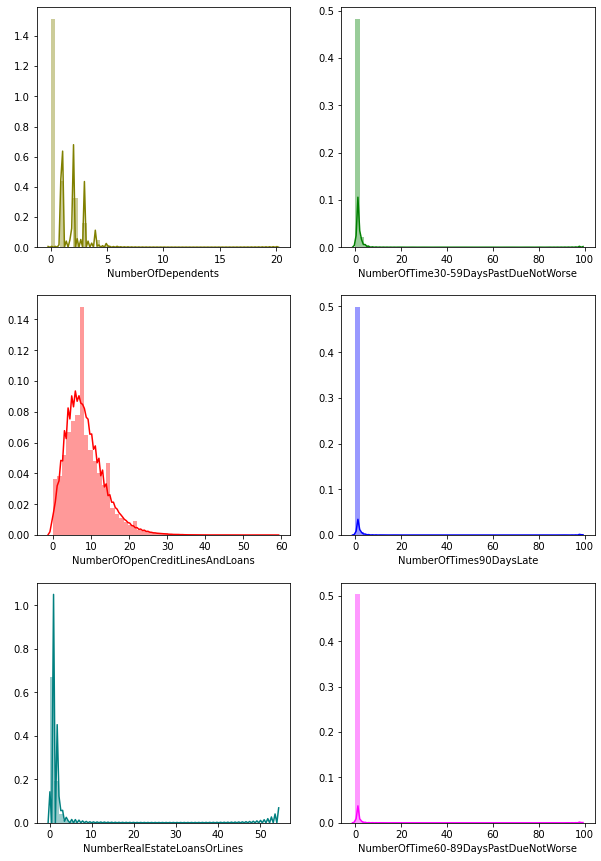

In [19]:
#check outliers in the distribution plots
df = train_full
f, axes = plt.subplots(3, 2, figsize=(10,15), sharex=False)
sns.distplot( df["NumberOfDependents"] , color="olive", ax=axes[0, 0])
sns.distplot( df["NumberOfTime30-59DaysPastDueNotWorse"] , color="green", ax=axes[0, 1])
sns.distplot( df["NumberOfOpenCreditLinesAndLoans"] , color="red", ax=axes[1, 0])
sns.distplot( df["NumberOfTimes90DaysLate"] , color="blue", ax=axes[1, 1])
sns.distplot( df["NumberRealEstateLoansOrLines"] , color="teal", ax=axes[2, 0])
sns.distplot( df["NumberOfTime60-89DaysPastDueNotWorse"] , color="magenta", ax=axes[2, 1]);

As we can see by a subset of 6 variables, they are almost all largely skewed to the right, meaning that there are many outliers present in the data. We will now remove rows containing an outlier in any of the variables. 

In [20]:
#calculate the z-score and set the threshold
zscore = np.abs(stats.zscore(df.iloc[:,1:11]))
threshold = 2.5

Let's count outliers as anything greater than 2.5 zscores from the mean, as this is a common rule of thumb.

In [21]:
#set new dataframe to not include outlier rows with >2.5 zscore
df_full = df
df_full = df_full[(zscore < 2.5).all(axis=1)]
print(df_full.shape)

(137774, 11)


As you can see, the outliers reduction method reduced the number of rows in the dataset to 137,774 from 150,000.

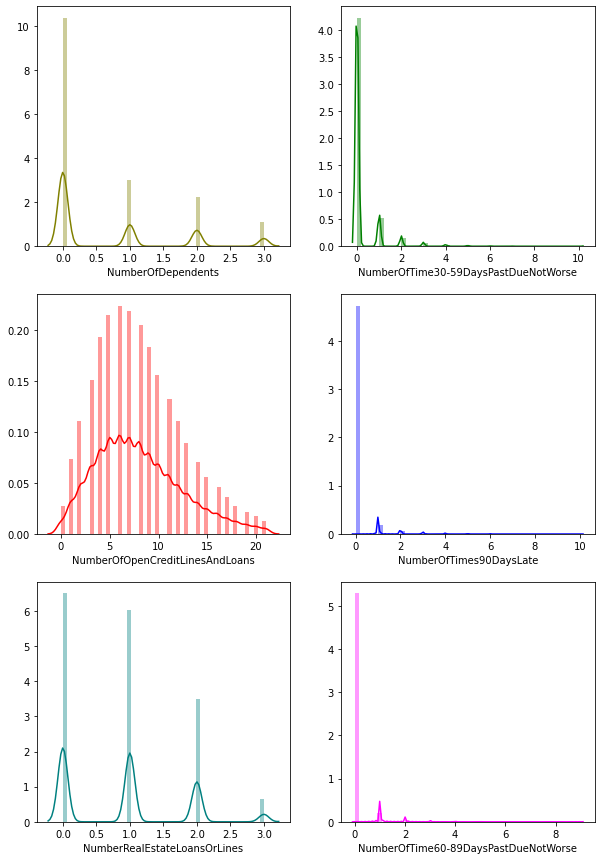

In [22]:
#plot dist plots without outliers
f, axes = plt.subplots(3, 2, figsize=(10, 15), sharex=False)
sns.distplot( df_full["NumberOfDependents"] , color="olive", ax=axes[0, 0])
sns.distplot( df_full["NumberOfTime30-59DaysPastDueNotWorse"] , color="green", ax=axes[0, 1])
sns.distplot( df_full["NumberOfOpenCreditLinesAndLoans"] , color="red", ax=axes[1, 0])
sns.distplot( df_full["NumberOfTimes90DaysLate"] , color="blue", ax=axes[1, 1])
sns.distplot( df_full["NumberRealEstateLoansOrLines"] , color="teal", ax=axes[2, 0])
sns.distplot( df_full["NumberOfTime60-89DaysPastDueNotWorse"] , color="magenta", ax=axes[2, 1]);

There is certainly improvement! We will need to apply transforms to ensure normal distributions for regression. It is perfectly okay that the distributions are still skewed, now the outlier values have just been removed.

Now we have a dataset void of outliers and missing values - let's move onto visualizations and more preprocessing. 

In [23]:
#export clean dataset to .csv file
df_full.to_csv('clean_data.csv')

# 4. Feature Exploration

# 4.1 Univariate Plot

### Dataset Age distribution? 

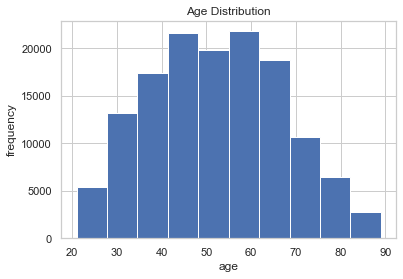

In [47]:
df_full['age'].hist()
plt.title('Age Distribution')
plt.xlabel('age')
plt.ylabel('frequency')
plt.show()

#### Age ranging from 20 to 90, a very complete range
### How many defaulted how many did not?

In [26]:
#take a quick look at how many datapoints defaulted(1) vs didn't default (0)
df_full['SeriousDlqin2yrs'].value_counts()

0    128946
1      8828
Name: SeriousDlqin2yrs, dtype: int64

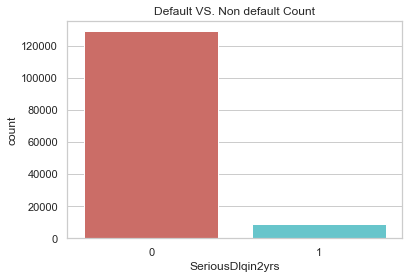

In [40]:
#graph distribution of target variable to visually see the difference
sns.set(style="white")
sns.set(style="whitegrid", color_codes=True)
sns.countplot(x='SeriousDlqin2yrs', data=df_full, palette ='hls')
plt.title('Default VS. Non default Count')
plt.show()

In [28]:
#look at the relative percentages of default/no-default to add more context
count_default = len(df_full[df_full['SeriousDlqin2yrs']==1])
count_no_default = len(df_full[df_full['SeriousDlqin2yrs']==0])
pct_of_default = count_default/(count_default+count_no_default)
print("percentage of default", pct_of_default*100)
pct_of_no_default = count_no_default/(count_default+count_no_default)
print("percentage of no default", pct_of_no_default*100)

percentage of default 6.407595046960965
percentage of no default 93.59240495303904


#### The dataset is largely non-defaulted loans (128946) with 8828 defaulted loans, which is expected since most loans will not default

### Monthly income distribution?

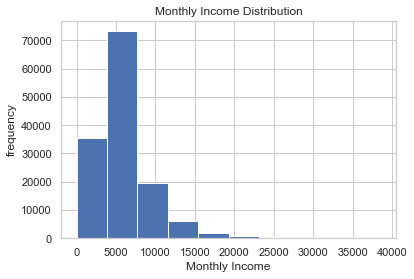

In [49]:
df_full['MonthlyIncome'].hist()
plt.title('Monthly Income Distribution')
plt.xlabel('Monthly Income')
plt.ylabel('frequency')
plt.show()

#### Majority is in the $5000 range with some extreme values above 20k a month. This is expected since most p2p loan customers are not high income.

# 4.2 Multivariate Plot
### What different characteristics does the default and non-default population have?

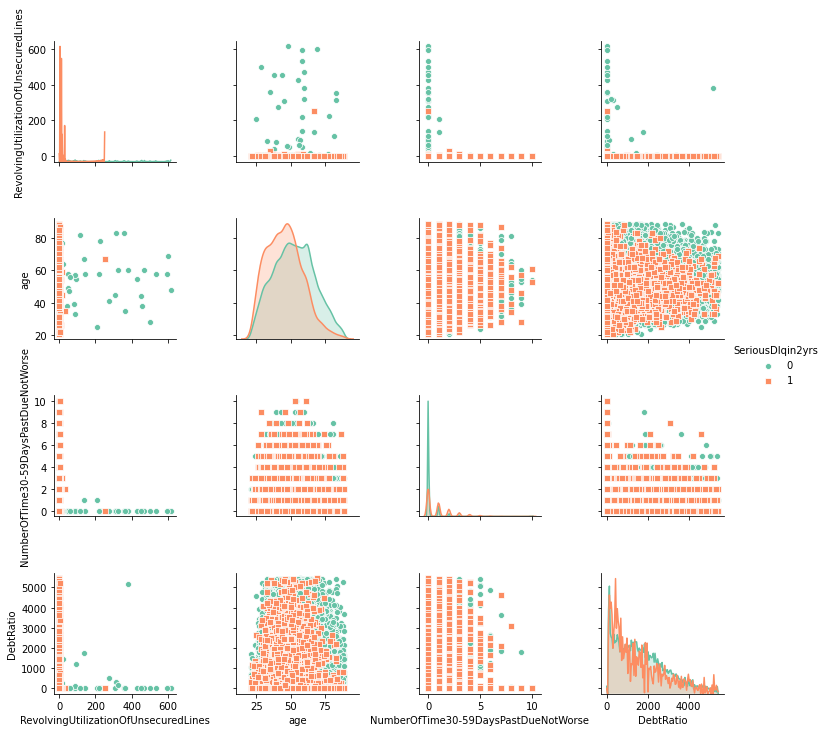

In [24]:
#create a pairplot to see scatter plots of all combinations of features
sns.pairplot(df_full.iloc[:,0:5], kind="scatter", hue="SeriousDlqin2yrs", markers=["o", "s"], palette="Set2");

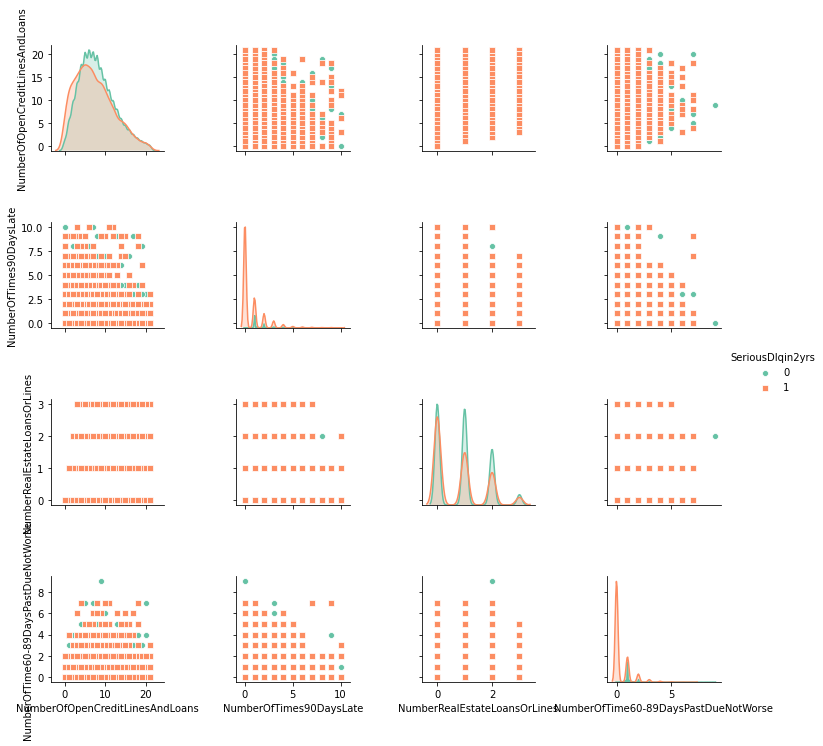

In [25]:
#create pairplot with remaining features
r = np.r_[0, 6:10]
sns.pairplot(df_full.iloc[:,r], kind="scatter", hue="SeriousDlqin2yrs", markers=["o", "s"], palette="Set2");

#### The above two pairplots indicates clear differences in characteristics of the default and non-default population.

In [30]:
scaler = MinMaxScaler()

#scale full dataframe into 0-1 by default
scaled_df = pd.DataFrame(scaler.fit_transform(df_full),columns=['SeriousDlqin2yrs','RevolvingUtilizationOfUnsecuredLines','age','NumberOfTime30-59DaysPastDueNotWorse','DebtRatio','MonthlyIncome','NumberOfOpenCreditLinesAndLoans','NumberOfTimes90DaysLate','NumberRealEstateLoansOrLines','NumberOfTime60-89DaysPastDueNotWorse','NumberOfDependents'])

In [31]:
default = scaled_df[scaled_df['SeriousDlqin2yrs']==1]
non_default =  scaled_df[scaled_df['SeriousDlqin2yrs']==0]

In [32]:
mean = pd.DataFrame({'default':default.mean(),'non_default':non_default.mean()})

### Which metrics have distinct differences?

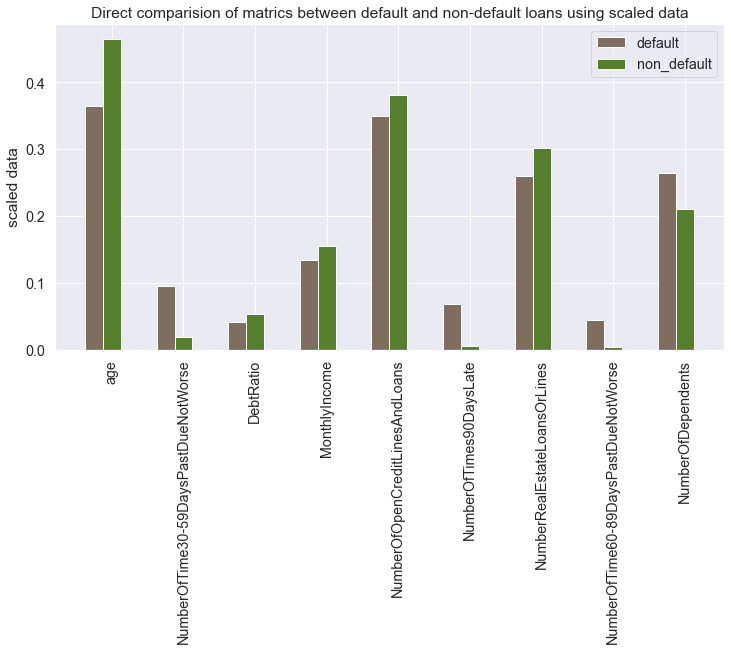

In [33]:
barWidth = 0.25
 
# set heights of bars
bars1 = mean['default'][2:]
bars2 = mean['non_default'][2:]

 
# Set position of bar on X axis
r1 = np.arange(len(bars1))
r2 = [x + barWidth for x in r1]
 
# Make the plot
plt.figure(figsize=(12,6))
plt.bar(r1, bars1, color='#7f6d5f', width=barWidth, edgecolor='white', label='default')
plt.bar(r2, bars2, color='#557f2d', width=barWidth, edgecolor='white', label='non_default')

plt.xticks([r + barWidth for r in range(len(bars1))],mean.index.to_list()[2:],rotation=90)
plt.ylabel('scaled data')
 
# Create legend & Show graphic
plt.title('Direct comparision of matrics between default and non-default loans using scaled data')
plt.legend()
plt.show()

#### Clear difference between the two populations on metrics such as age, # of dependents, and monthly income

### Any correlation between the metrics? 

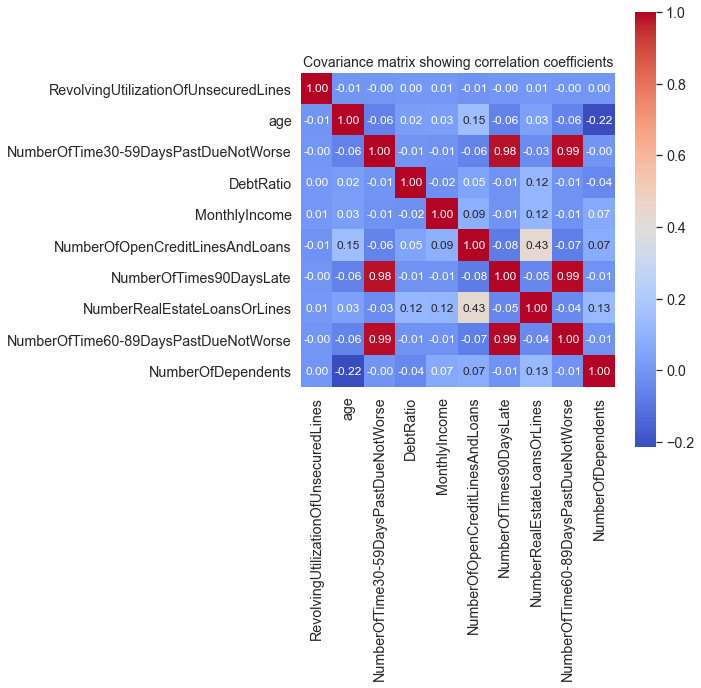

In [29]:
#create heatmap plot to show covariance between the different features in the dataset
columns=(['RevolvingUtilizationOfUnsecuredLines','age','NumberOfTime30-59DaysPastDueNotWorse','DebtRatio','MonthlyIncome','NumberOfOpenCreditLinesAndLoans','NumberOfTimes90DaysLate','NumberRealEstateLoansOrLines','NumberOfTime60-89DaysPastDueNotWorse','NumberOfDependents'])
stdsc = StandardScaler() 
X_std = stdsc.fit_transform(df[columns].iloc[:,range(0,10)].values)
cov_mat =np.cov(X_std.T)
plt.figure(figsize=(10,10))
sns.set(font_scale=1.3)
hm = sns.heatmap(cov_mat,
                 cbar=True,
                 annot=True,
                 square=True,
                 fmt='.2f',
                 annot_kws={'size': 12},
                 cmap='coolwarm',                 
                 yticklabels=columns,
                 xticklabels=columns)
plt.title('Covariance matrix showing correlation coefficients', size = 14)
plt.tight_layout()
#print('Covariance matrix showing correlation coefficients')
plt.show()

#### As you can see from this covariance matrix, the majority of features are not collinear. However, the # of days deliquent variables are highly collinear. This make sense logically because if a data point is late (whether it is 30 days, 60 days, 90 days, etc.) it is likely to result in a defaulted loan. Therefore, these features convey similar information which is why they have high correlations above.

# 4.3 Bivariate plot
### Older people have higher income?

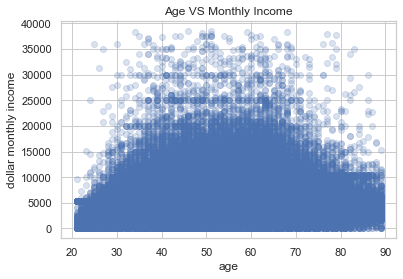

In [54]:
plt.scatter(df_full['age'],df_full['MonthlyIncome'],alpha=.2)
plt.title('Age VS Monthly Income')
plt.xlabel('age')
plt.ylabel('dollar monthly income')
plt.show()

#### As we can see, with these many data points, no clear linear relationship between the two variables.
### Lower the monthly Income higher the Debt ratio?

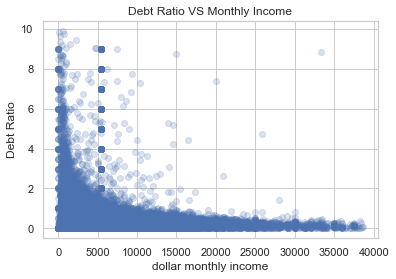

In [57]:
plt.scatter(df_full[df_full['DebtRatio']<10]['MonthlyIncome'],df_full[df_full['DebtRatio']<10]['DebtRatio'],alpha=.2)
plt.title('Debt Ratio VS Monthly Income')
plt.ylabel('Debt Ratio')
plt.xlabel('dollar monthly income')
plt.show()

#### Very clear negative exponational realtionship. Very high income population have much lower debt ratio

### Does the high risk population have a much higher default rate?

In [34]:
default_unscaled = df_full[df_full['SeriousDlqin2yrs']==1]
non_default_unscaled =  df_full[df_full['SeriousDlqin2yrs']==0]
mean_unscaled = pd.DataFrame({'default':default_unscaled.mean(),'non_default':non_default_unscaled.mean()})

In [35]:
print('average age')
print('default: ',mean_unscaled['default']['age'])
print('non default: ',mean_unscaled['non_default']['age'])
print()
print('average income')
print('default: ',mean_unscaled['default']['MonthlyIncome'])
print('non default: ',mean_unscaled['non_default']['MonthlyIncome'])
print()
print('number of dependents')
print('default: ',mean_unscaled['default']['NumberOfDependents'])
print('non default: ',mean_unscaled['non_default']['NumberOfDependents'])

average age
default:  45.80924331671953
non default:  52.61870860670358

average income
default:  5168.142387856819
non default:  6003.654940827943

number of dependents
default:  0.7953103760761214
non default:  0.630426690242427


In [36]:
dangerous = df_full[(df_full['age']<mean_unscaled['default']['age']) & (df_full['MonthlyIncome']<mean_unscaled['default']['MonthlyIncome']) & (df_full['NumberOfDependents']>mean_unscaled['default']['NumberOfDependents'])]

In [37]:
dangerous['SeriousDlqin2yrs'].value_counts()

0    8718
1    1321
Name: SeriousDlqin2yrs, dtype: int64

In [38]:
df_full['SeriousDlqin2yrs'].value_counts()

0    128946
1      8828
Name: SeriousDlqin2yrs, dtype: int64

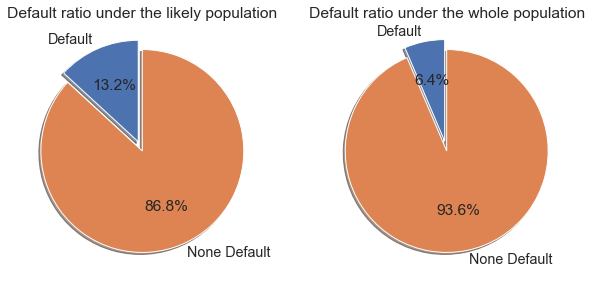

In [39]:
fig, (ax1,ax2) = plt.subplots(1,2,figsize=(10,10))
labels = 'Default', 'None Default'
sizes = [1321/dangerous.shape[0], 8718/dangerous.shape[0]]
full_size = [8828/df_full.shape[0],128946/df_full.shape[0]]
explode = (0.1, 0) 

ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.title.set_text('Default ratio under the likely population')

ax2.pie(full_size, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax2.title.set_text('Default ratio under the whole population')

plt.show()

#### As we can see, the likelihood of default under this high risk group is more than double of the population's default likelihood. 